In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#load travel dataset
df = pd.read_csv("/Users/ibtihalkhan/Desktop/anamta/Tour_And_Travel_info.csv")
df

,country,days,destination,end_in,travel_style,max_group_size,age_range,operated_in,hygiene,cost,...,reviews,transport_rating,food_rating,guide_rating,accommodation_rating,tourOperator_rating,tourOperater,highlights,total_review,review_date
0,/d/benin/,5,Benin Highlights 5Days / 4Nights ...,Start and end in Cotonou,['\n Keep Exploring Benin Complete S...,8.0,8 to 90,\r\n English\r\n ...,Included,['€824'],...,['My journey was very good. My guide Simon was...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18reviewsaboutAcrossAfricaTours&Travel,"·May18th,2021 ·February23rd,2021 ·December18th..."
1,/d/benin/,9,Best Benin Explorer 9Days / 8Nights ...,Start and end in Cotonou,['\n Keep Exploring Benin Complete S...,8.0,8 to 90,\r\n English\r\n ...,Included,"['€1,816']",...,['My journey was very good. My guide Simon was...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18reviewsaboutAcrossAfricaTours&Travel,"·May18th,2021 ·February23rd,2021 ·December18th..."
2,/d/benin/,14,Benin and Togo Voodoo Discovery,Start and end in Lome,"['DiscoveryPrivateGroupFully Guided', '\n ...",16.0,14 to 85,\r\n English\r\n ...,NaN,"['€2,462']",...,"[""Janvier's knowledge and enthusiasm to share ...",5.0,4.0,5.0,4.0,4.5,Explore!,Witness the intriguing and esoteric rituals of...,1review,"·September3rd,2019 ·May17th,2019"
3,/d/botswana,8,8 Days Safari tour itinerary for Botswana: Ven...,From Maun to Kasane,['AdventurePrivateGroupFully GuidedEasyChristm...,10.0,6 to 92,\r\n English\r\n ...,NaN,"['€2,062']",...,['my family of 5 booked this tour and surprisi...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1reviewaboutLittleRozTours,"·February21st,2019"
4,/d/botswana,8,8 Days Safari tour itinerary for Makgadikgadi ...,Start and end in Maun,['SafariPrivateGroupFully GuidedEasyChristmas ...,10.0,7 to 90,\r\n English\r\n ...,NaN,"['€1,444']",...,['my family of 5 booked this tour and surprisi...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1reviewaboutLittleRozTours,"·February21st,2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27569,/d/uruguay,\r\n \r\n 9 days,Buenos Aires to Rio de Janeiro (via Uruguay) T...,From Buenos Aires to Punta Del Este,['ExplorerHop On/OffSelf-GuidedPrivateIndepend...,20.0,\r\n 10 to 99\r\n ...,\r\n English\r\n ...,NaN,"['₹118,484']",...,['Loved Iguazú Falls. Loved the hotel. First d...,NaN,NaN,NaN,NaN,4.3,\r\n Bamba\r\n,NaN,"1,107reviewsaboutBamba","·January31st,2020 ·June10th,2021 ·April13th,2020"
27570,/d/venezuela,\r\n \r\n 14 days,Trails of Venezuela,From Caracas to Los Roques,['AdventureBeachGroupPartially GuidedIn-depth ...,12.0,\r\n 18 to 99\r\n ...,\r\n English\r\n ...,NaN,"['₹526,339']",...,[],NaN,NaN,NaN,NaN,NaN,\r\n Crooked Compass\r\n ...,Angel Falls Visit Indigenous communities Exper...,"6,259reviewsaboutTourRadar",NaN
27571,/d/virgin-island-british,\r\n \r\n 7 days,Sailing the British Virgin Islands – Tortola t...,Start and end in Tortola,['SailingSailboatPrivateGroupFully GuidedDisco...,8.0,\r\n 16 to 99\r\n ...,\r\n English\r\n ...,NaN,"['₹104,749']",...,['Yes... we knew we were going to have to buy ...,3.2,2.0,4.3,3.2,4.6,\r\n G Adventures\r\n ...,Visit the world famous Willy-T floating bar Sn...,5reviews,"·April14th,2019 ·April14th,2019 ·October22nd,2..."
27572,/d/virgin-island-british,Book with flexibility\r\n \r\n ...,Sailing the British Virgin Islands – Tortola t...,Start and end in Spanish Town,['SailingAdventurePrivateGroupFully GuidedDisc...,8.0,\r\n 12 to 99\r\n ...,\r\n English\r\n ...,NaN,"['₹104,749']",...,['The teams are very professional and they too...,NaN,NaN,NaN,NaN,4.6,\r\n G Adventures\r\n ...,NaN,"6,313reviewsaboutGAdventures","·July26th,2021 ·July26th,2021 ·July26th,2021"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27574 entries, 0 to 27573
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               27574 non-null  object 
 1   days                  27566 non-null  object 
 2   destination           27566 non-null  object 
 3   end_in                27566 non-null  object 
 4   travel_style          27574 non-null  object 
 5   max_group_size        26951 non-null  float64
 6   age_range             27562 non-null  object 
 7   operated_in           27566 non-null  object 
 8   hygiene               4269 non-null   object 
 9   cost                  27574 non-null  object 
 10  visiting_places       27574 non-null  object 
 11  description           27557 non-null  object 
 12  over_al_rating        7263 non-null   float64
 13  reviews               27574 non-null  object 
 14  transport_rating      6847 non-null   float64
 15  food_rating        

looking at the above,we can clearly see that the dataset contain 27573 rows and 23 columns 

In [5]:
print("\n\nNumber of nan value present in the dataset\n") 
print(df.isnull().sum(), end = '\n\n')

print("\n\nTotal duplicate data in the dataset\n")
print(df.duplicated().sum())



Number of nan value present in the dataset

country                     0
days                        8
destination                 8
end_in                      8
travel_style                0
max_group_size            623
age_range                  12
operated_in                 8
hygiene                 23305
cost                        0
visiting_places             0
description                17
over_al_rating          20311
reviews                     0
transport_rating        20727
food_rating             20993
guide_rating            21414
accommodation_rating    20752
tourOperator_rating      5155
tourOperater                8
highlights              24159
total_review                8
review_date              5176
dtype: int64



Total duplicate data in the dataset

954


looking at the information it seems that some columns contains null values such as hygiene,highlights,reveiws_date,over_al_rating,destination and so on and as we are using destination feature in our reccomendation that why we have to remove all destination that contain null values.the dataset also have 954 duplicate rows


## cleaning a dataset

In [7]:
#replace all uneccesary charachter such as \n,\d,[,an so on with empty string 
df = df.replace(r"\\n|\[|\'|\]|\/d\/|\/|\r\n|",'', regex= True)
#remove string value and spaces from cost column 
df['cost'] = df['cost'].str.replace(r'\D', '')
#remove string value and spaces from days column 
df['days'] = df['days'].str.replace(r'\D', '')
#remove string value and spaces from total_reviews column 
df['total_review'] = df['total_review'].str.replace(r'\D', '')

,country,days,destination,end_in,travel_style,max_group_size,age_range,operated_in,hygiene,cost,...,reviews,transport_rating,food_rating,guide_rating,accommodation_rating,tourOperator_rating,tourOperater,highlights,total_review,review_date
0,benin,5,Benin Highlights 5Days 4Nights,Start and end in Cotonou,Keep Exploring Benin Complete Safar...,8.0,8 to 90,English,Included,824,...,My journey was very good. My guide Simon was a...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18,"·May18th,2021 ·February23rd,2021 ·December18th..."
1,benin,9,Best Benin Explorer 9Days 8Nights ...,Start and end in Cotonou,Keep Exploring Benin Complete Safar...,8.0,8 to 90,English,Included,1816,...,My journey was very good. My guide Simon was a...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18,"·May18th,2021 ·February23rd,2021 ·December18th..."
2,benin,14,Benin and Togo Voodoo Discovery,Start and end in Lome,"DiscoveryPrivateGroupFully Guided, Kee...",16.0,14 to 85,English,NaN,2462,...,"""Janviers knowledge and enthusiasm to share th...",5.0,4.0,5.0,4.0,4.5,Explore!,Witness the intriguing and esoteric rituals of...,1,"·September3rd,2019 ·May17th,2019"
3,botswana,8,8 Days Safari tour itinerary for Botswana: Ven...,From Maun to Kasane,AdventurePrivateGroupFully GuidedEasyChristmas...,10.0,6 to 92,English,NaN,2062,...,my family of 5 booked this tour and surprising...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1,"·February21st,2019"
4,botswana,8,8 Days Safari tour itinerary for Makgadikgadi ...,Start and end in Maun,SafariPrivateGroupFully GuidedEasyChristmas & ...,10.0,7 to 90,English,NaN,1444,...,my family of 5 booked this tour and surprising...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1,"·February21st,2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27569,uruguay,9,Buenos Aires to Rio de Janeiro (via Uruguay) T...,From Buenos Aires to Punta Del Este,ExplorerHop OnOffSelf-GuidedPrivateIndependent...,20.0,10 to 99 ...,English,NaN,118484,...,Loved Iguazú Falls. Loved the hotel. First day...,NaN,NaN,NaN,NaN,4.3,Bamba,NaN,1107,"·January31st,2020 ·June10th,2021 ·April13th,2020"
27570,venezuela,14,Trails of Venezuela,From Caracas to Los Roques,AdventureBeachGroupPartially GuidedIn-depth Cu...,12.0,18 to 99 ...,English,NaN,526339,...,,NaN,NaN,NaN,NaN,NaN,Crooked Compass ...,Angel Falls Visit Indigenous communities Exper...,6259,NaN
27571,virgin-island-british,7,Sailing the British Virgin Islands – Tortola t...,Start and end in Tortola,SailingSailboatPrivateGroupFully GuidedDiscove...,8.0,16 to 99 ...,English,NaN,104749,...,Yes... we knew we were going to have to buy fo...,3.2,2.0,4.3,3.2,4.6,G Adventures,Visit the world famous Willy-T floating bar Sn...,5,"·April14th,2019 ·April14th,2019 ·October22nd,2..."
27572,virgin-island-british,7,Sailing the British Virgin Islands – Tortola t...,Start and end in Spanish Town,SailingAdventurePrivateGroupFully GuidedDiscov...,8.0,12 to 99 ...,English,NaN,104749,...,The teams are very professional and they took ...,NaN,NaN,NaN,NaN,4.6,G Adventures,NaN,6313,"·July26th,2021 ·July26th,2021 ·July26th,2021"


In [8]:
#dropping duplicates values from a dataset
df = df.drop_duplicates()
#Drop only if nan in destination column 
df = df.dropna(subset = ['destination'])
df

,country,days,destination,end_in,travel_style,max_group_size,age_range,operated_in,hygiene,cost,...,reviews,transport_rating,food_rating,guide_rating,accommodation_rating,tourOperator_rating,tourOperater,highlights,total_review,review_date
0,benin,5,Benin Highlights 5Days 4Nights,Start and end in Cotonou,Keep Exploring Benin Complete Safar...,8.0,8 to 90,English,Included,824,...,My journey was very good. My guide Simon was a...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18,"·May18th,2021 ·February23rd,2021 ·December18th..."
1,benin,9,Best Benin Explorer 9Days 8Nights ...,Start and end in Cotonou,Keep Exploring Benin Complete Safar...,8.0,8 to 90,English,Included,1816,...,My journey was very good. My guide Simon was a...,NaN,NaN,NaN,NaN,4.6,Across Africa Tours & Travel,NaN,18,"·May18th,2021 ·February23rd,2021 ·December18th..."
2,benin,14,Benin and Togo Voodoo Discovery,Start and end in Lome,"DiscoveryPrivateGroupFully Guided, Kee...",16.0,14 to 85,English,NaN,2462,...,"""Janviers knowledge and enthusiasm to share th...",5.0,4.0,5.0,4.0,4.5,Explore!,Witness the intriguing and esoteric rituals of...,1,"·September3rd,2019 ·May17th,2019"
3,botswana,8,8 Days Safari tour itinerary for Botswana: Ven...,From Maun to Kasane,AdventurePrivateGroupFully GuidedEasyChristmas...,10.0,6 to 92,English,NaN,2062,...,my family of 5 booked this tour and surprising...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1,"·February21st,2019"
4,botswana,8,8 Days Safari tour itinerary for Makgadikgadi ...,Start and end in Maun,SafariPrivateGroupFully GuidedEasyChristmas & ...,10.0,7 to 90,English,NaN,1444,...,my family of 5 booked this tour and surprising...,NaN,NaN,NaN,NaN,5.0,Little Roz Tours,NaN,1,"·February21st,2019"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27569,uruguay,9,Buenos Aires to Rio de Janeiro (via Uruguay) T...,From Buenos Aires to Punta Del Este,ExplorerHop OnOffSelf-GuidedPrivateIndependent...,20.0,10 to 99 ...,English,NaN,118484,...,Loved Iguazú Falls. Loved the hotel. First day...,NaN,NaN,NaN,NaN,4.3,Bamba,NaN,1107,"·January31st,2020 ·June10th,2021 ·April13th,2020"
27570,venezuela,14,Trails of Venezuela,From Caracas to Los Roques,AdventureBeachGroupPartially GuidedIn-depth Cu...,12.0,18 to 99 ...,English,NaN,526339,...,,NaN,NaN,NaN,NaN,NaN,Crooked Compass ...,Angel Falls Visit Indigenous communities Exper...,6259,NaN
27571,virgin-island-british,7,Sailing the British Virgin Islands – Tortola t...,Start and end in Tortola,SailingSailboatPrivateGroupFully GuidedDiscove...,8.0,16 to 99 ...,English,NaN,104749,...,Yes... we knew we were going to have to buy fo...,3.2,2.0,4.3,3.2,4.6,G Adventures,Visit the world famous Willy-T floating bar Sn...,5,"·April14th,2019 ·April14th,2019 ·October22nd,2..."
27572,virgin-island-british,7,Sailing the British Virgin Islands – Tortola t...,Start and end in Spanish Town,SailingAdventurePrivateGroupFully GuidedDiscov...,8.0,12 to 99 ...,English,NaN,104749,...,The teams are very professional and they took ...,NaN,NaN,NaN,NaN,4.6,G Adventures,NaN,6313,"·July26th,2021 ·July26th,2021 ·July26th,2021"


In [9]:
#check how many rows left after cleaning a dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26618 entries, 0 to 27573
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               26618 non-null  object 
 1   days                  26618 non-null  object 
 2   destination           26618 non-null  object 
 3   end_in                26618 non-null  object 
 4   travel_style          26618 non-null  object 
 5   max_group_size        26018 non-null  float64
 6   age_range             26614 non-null  object 
 7   operated_in           26618 non-null  object 
 8   hygiene               4152 non-null   object 
 9   cost                  26618 non-null  object 
 10  visiting_places       26618 non-null  object 
 11  description           26609 non-null  object 
 12  over_al_rating        7034 non-null   float64
 13  reviews               26618 non-null  object 
 14  transport_rating      6628 non-null   float64
 15  food_rating        

## Perform EDA on a dataset

In [7]:
df.info()
print("\nAvailable countries in the dataset\n")
print(df['country'].unique())

print("\nAvailable duration of stay in the dataset\n")
print(df['days'].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26618 entries, 0 to 27573
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               26618 non-null  object 
 1   days                  26618 non-null  object 
 2   destination           26618 non-null  object 
 3   end_in                26618 non-null  object 
 4   travel_style          26618 non-null  object 
 5   max_group_size        26018 non-null  float64
 6   age_range             26614 non-null  object 
 7   operated_in           26618 non-null  object 
 8   hygiene               4152 non-null   object 
 9   cost                  26618 non-null  object 
 10  visiting_places       26618 non-null  object 
 11  description           26609 non-null  object 
 12  over_al_rating        7034 non-null   float64
 13  reviews               26618 non-null  object 
 14  transport_rating      6628 non-null   float64
 15  food_rating        

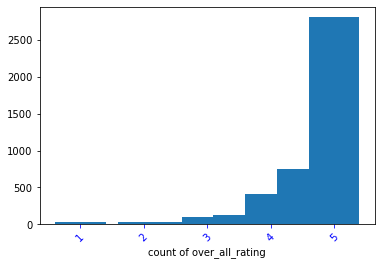

In [62]:
#plot of over_all rating count
rating_counts = dict(df.over_al_rating.value_counts())
fig, ax = plt.subplots()
ax.bar(x = list(rating_counts.keys()), height = list(rating_counts.values())) 
ax.tick_params('x', labelrotation = 45, colors = 'blue')
plt.xlabel("count of over_all_rating")
plt.show()

Looking at the above plot it seems like maximum destinations got high rating

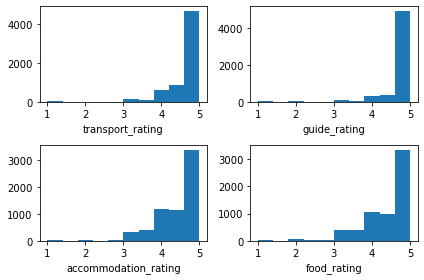

In [63]:
#create plot to visualize all the rating count
fig, ax = plt.subplots(2,2)
ax[0,0].hist(df.transport_rating)
ax[0,1].hist(df.guide_rating)
ax[1,0].hist(df.accommodation_rating)
ax[1,1].hist(df.food_rating)
ax[0,0].set_xlabel('transport_rating')
ax[0,1].set_xlabel('guide_rating') 
ax[1,0].set_xlabel('accommodation_rating')
ax[1,1].set_xlabel('food_rating')
fig.tight_layout()
plt.show()

Looking at the above plots it looks like maximum destination got between 4.5 to 5 ratings

In [53]:
#count no's of destination each country have
print(df.groupby('country')['destination'].count().sort_values(ascending=False))

country
india                               3056
tanzania                            1476
italy                               1320
peru                                1119
egypt                                988
                                    ... 
andorra                                3
benin                                  3
saint-vincent-and-the-grenadines       2
honduras                               2
venezuela                              1
Name: destination, Length: 130, dtype: int64


Looking at the above table its seems like india and tanzania has more destination/places to visit and the least destination/places have in country honduras and venezuela according to the dataset scrapped and the dataset contain information about 130 countries
